In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
%matplotlib inline

In [18]:
California_housing = pd.read_csv(r"C:\Users\vishal\Downloads\housing.csv\housing.csv")

In [19]:
drop_cols = ['longitude','latitude','ocean_proximity']
California_housing.drop(columns=drop_cols,inplace=True)

In [20]:
California_housing.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [21]:
col_names = California_housing.columns

# Standardization 

In [22]:
scaler = preprocessing.StandardScaler()
scaler.fit(California_housing)
California_housing_arr = scaler.transform(California_housing)

In [23]:
California_housing = pd.DataFrame(California_housing_arr,columns=col_names)

In [24]:
California_housing.head()
California_housing.dropna(inplace=True)

# Defining Predictor variables and Target Variable

In [25]:
X = California_housing[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
y = California_housing['median_house_value']

# Splitting data into Train and Test set  

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# OLS

In [27]:
class LR:
    def fit(self, X, y):
        ones = np.ones(len(X)).reshape(-1, 1)
        X = np.concatenate((ones, X), axis=1)
        B = np.matmul(np.linalg.pinv(np.matmul(X.T, X)), np.matmul(X.T, y))
        self.slope = B[1:]
        self.intercept = B[0]
    def predict(self, X):
        self.predicted = np.dot(X, self.slope) + self.intercept
        return self.predicted


In [28]:
lm = LR()
lm.fit(X_train,y_train)
lmpredicted = lm.predict(X_test)

In [48]:
lmpredicted = np.array(lmpredicted)

Text(0.5, 1.0, 'OLS')

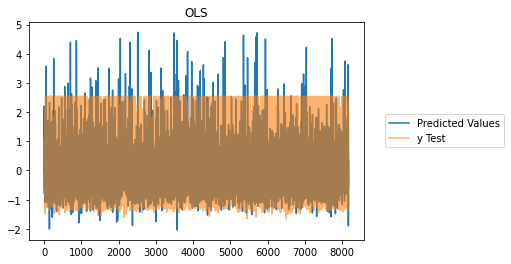

In [123]:
y_test = np.array(y_test)
X_test = np.array(X_test)

plt.plot(lmpredicted, alpha = 1)
plt.plot(y_test, alpha = 0.6)

plt.legend(["Predicted Values","y Test"],bbox_to_anchor = (1.05, 0.6))
plt.title("OLS")


Text(0.5, 1.0, 'Overlap of Predicted and Actual Points for OLS')

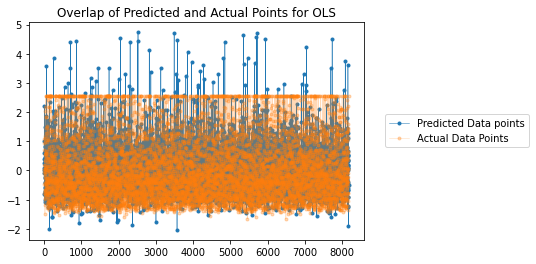

In [65]:
#plt.scatter(lmpredicted,y_test)
plt.plot(lmpredicted, alpha = 1, linewidth = 0.5, marker ='.')
plt.plot(y_test, alpha=0.3, linewidth = 0.5, marker ='.')
plt.legend(['Predicted Data points','Actual Data Points'],bbox_to_anchor = (1.05, 0.6))
plt.title("Overlap of Predicted and Actual Points for OLS")

# L2 Regularization (Ridge)

In [67]:
class Ridge(LR):

    def __init__(self,  alpha=1, learning_rate=0.005, max_iter=1000):   #Constructor 
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.alpha = alpha
    def fit(self, X, y) :                                              #Calculating slope and intercept
        self.W = np.random.randn(X.shape[1])
        self.b = 0
        for i in range(self.max_iter):
            y_pred = self.predict(X)
            LW = (-(2*(X.T).dot(y - y_pred)) + (2*self.alpha*self.W))/X.shape[0]
            Lb = -2*np.sum(y - y_pred)/X.shape[0]
            self.W -= self.learning_rate*LW
            self.b -= self.learning_rate*Lb
    def predict(self, X):                                             #Calculating line of best fit 
        return np.dot(X, self.W) + self.b

In [68]:
ridge = Ridge()
ridge.fit(X_train,y_train)

In [69]:
Ridge_model = ridge.predict(X_test)
Ridge_model = np.array(Ridge_model)

In [70]:
ridge.W

housing_median_age    0.211984
total_rooms           0.113297
total_bedrooms       -0.015071
population           -0.523476
households            0.501833
median_income         0.678739
dtype: float64

Text(0.5, 1.0, 'Overlap of Predicted and Actual Points for L2 Regularization')

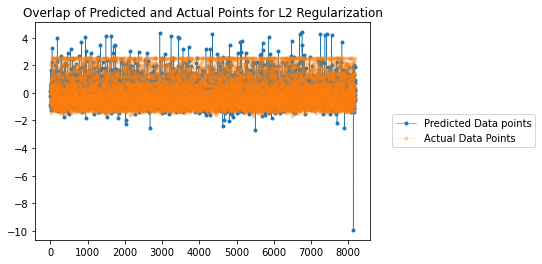

In [71]:
plt.plot(Ridge_model, alpha = 1, linewidth = 0.5, marker ='.')
plt.plot(y_test, alpha=0.3, linewidth = 0.5, marker ='.')
plt.legend(['Predicted Data points','Actual Data Points'],bbox_to_anchor = (1.05, 0.6))
plt.title("Overlap of Predicted and Actual Points for L2 Regularization")

# L1 Regularization(Lasso)

In [72]:
class Lasso:

    def __init__(self,  alpha=1, learning_rate=0.005, max_iter=1000):         #Constructor 
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.alpha = alpha
    def fit(self, X, y) :                                                     #Calculating Intercept and slopw
        self.W = np.zeros(X.shape[1])
        self.b = 0
        for i in range(self.max_iter):
            y_pred = self.predict(X)
            LW = (-(2*(X.T).dot(y - y_pred)) + (self.alpha))/X.shape[0]
            Lb = -2*np.sum(y - y_pred )/X.shape[0]
            self.W -= self.learning_rate*LW
            self.b -= self.learning_rate*Lb
    def predict(self, X) :                                                    #Line of best fit 
        return np.dot(X, self.W) + self.b

In [75]:
lasso =Lasso()
lasso.fit( X_train, y_train)
Lasso_model = lasso.predict(X_test)
Lasso_model = np.array(Lasso_model)

In [76]:
lasso.W

housing_median_age    0.207396
total_rooms          -0.093210
total_bedrooms        0.200324
population           -0.264450
households            0.237515
median_income         0.726952
dtype: float64

Text(0.5, 1.0, 'Overlap of Predicted and Actual Points for L1 Regularization')

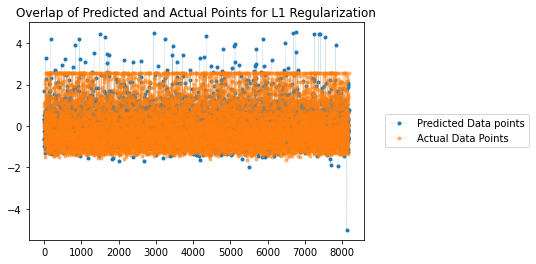

In [88]:
plt.plot(Lasso_model, alpha = 1, linewidth = 0.1, marker ='.')
plt.plot(y_test, alpha=0.5, linewidth = 0.3, marker ='.')
plt.legend(['Predicted Data points','Actual Data Points'],bbox_to_anchor = (1.05, 0.6))
plt.title("Overlap of Predicted and Actual Points for L1 Regularization")

# ElasticNet

In [79]:
class Elastic:

    def __init__(self,  alpha= 1, l1_ratio= 0.0001, learning_rate=0.005, max_iter=1000):  #Constructor 
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.alpha = alpha
        self.l1_ratio = l1_ratio
    def fit(self, X, y) :                                                                 #Calulating slope and intercept 
        self.W = np.zeros(X.shape[1])
        self.b = 0
        for i in range(self.max_iter):
            y_pred = self.predict(X)
            LW = (-(2*(X.T).dot(y - y_pred)) + (self.alpha*self.l1_ratio) + (self.alpha*(1 - self.l1_ratio)*self.W))/X.shape[0]
            Lb = -2*np.sum(y - y_pred )/X.shape[0]
            self.W -= self.learning_rate*LW
            self.b -= self.learning_rate*Lb
    def predict(self, X) :    
        return np.dot(X, self.W) + self.b                                                #Line of best fit 

In [80]:
Elastic = Elastic()
Elastic.fit(X_train,y_train)

In [81]:
Elastic_model = Elastic.predict(X_test)
Elastic_model = np.array(Elastic_model)

In [82]:
Elastic.W

housing_median_age    0.207451
total_rooms          -0.093176
total_bedrooms        0.200318
population           -0.264378
households            0.237482
median_income         0.726965
dtype: float64

Text(0.5, 1.0, 'Overlap of Predicted and Actual Points for ElasticNet Regularization')

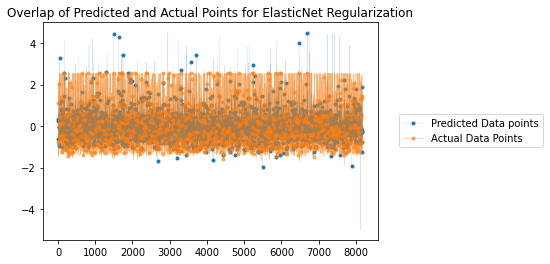

In [85]:
plt.plot(Elastic_model, alpha = 1, linewidth = 0.1, marker ='.', markevery = 5)
plt.plot(y_test, alpha=0.6, linewidth = 0.5, marker ='.', markevery = 10)
plt.legend(['Predicted Data points','Actual Data Points'],bbox_to_anchor = (1.05, 0.6))
plt.title("Overlap of Predicted and Actual Points for ElasticNet Regularization")

In [30]:
newdf = pd.DataFrame([Elastic.W,lasso.W,ridge.W],['Elastic_coef','Lasso_coef','Ridge_coef'])

In [31]:
newdf

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
Elastic_coef,0.215229,-0.083739,0.196854,-0.252709,0.220421,0.724782
Lasso_coef,0.215176,-0.083769,0.196856,-0.252769,0.220449,0.724769
Ridge_coef,0.205851,-0.752630,1.295129,-0.073002,-0.409557,0.880596


# Comparison of Coefficients 

Text(0.5, 1.0, 'Housing Median Age')

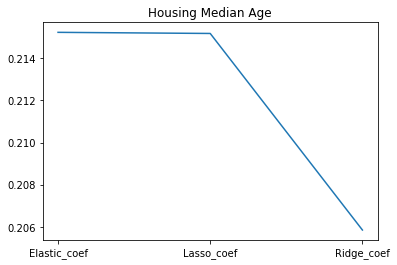

In [32]:
plt.plot(newdf['housing_median_age'])
plt.title("Housing Median Age")

Text(0.5, 1.0, 'Total Rooms')

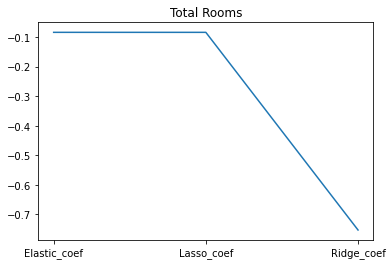

In [33]:
plt.plot(newdf['total_rooms'])
plt.title("Total Rooms")

Text(0.5, 1.0, 'Total BedRooms')

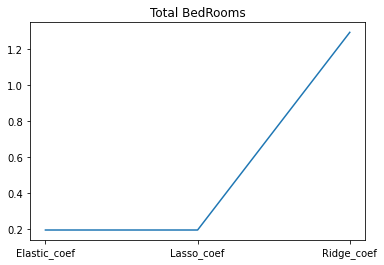

In [34]:
plt.plot(newdf['total_bedrooms'])
plt.title("Total BedRooms")

Text(0.5, 1.0, 'Population')

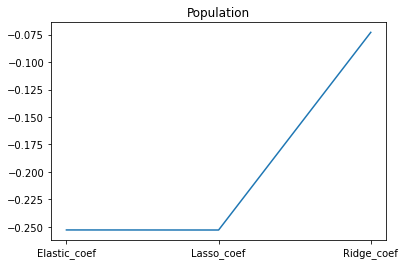

In [35]:
plt.plot(newdf['population'])
plt.title("Population")

Text(0.5, 1.0, 'Number of Households')

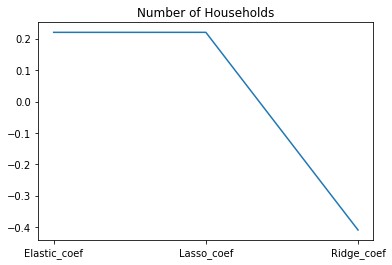

In [36]:
plt.plot(newdf['households'])
plt.title("Number of Households")

Text(0.5, 1.0, 'Median Income')

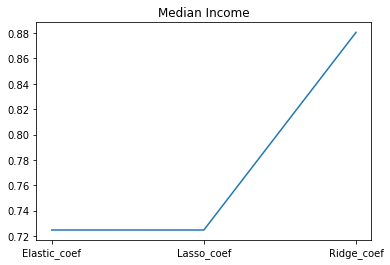

In [37]:
plt.plot(newdf['median_income'])
plt.title('Median Income')

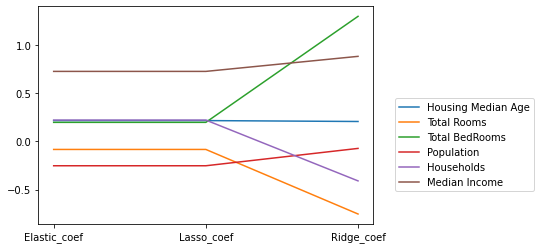

In [38]:
plt.plot(newdf['housing_median_age'])
plt.plot(newdf['total_rooms'])
plt.plot(newdf['total_bedrooms'])
plt.plot(newdf['population'])
plt.plot(newdf['households'])
plt.plot(newdf['median_income'])

plt.legend(['Housing Median Age','Total Rooms','Total BedRooms','Population','Households', 'Median Income'],bbox_to_anchor = (1.05, 0.6))

# Comparison of predicted Values 

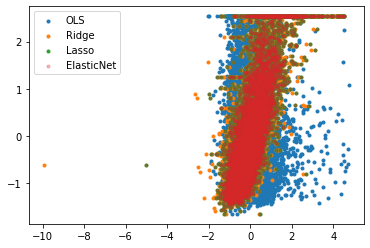

In [119]:
plt.scatter(lmpredicted, y_test, marker=".")
plt.scatter(Ridge_model,y_test, marker=".")
plt.scatter(Lasso_model, y_test, marker=".")
plt.scatter(Elastic_model, y_test, alpha =0.3, marker=".")
plt.legend(["OLS","Ridge","Lasso","ElasticNet"])

